In [43]:


# convolutional neural network from

# Nitish_Gangwar     06 Oct, 2021 
# Applying Convolutional Neural Network on mnist dataset
# https://www.geeksforgeeks.org/applying-convolutional-neural-network-on-mnist-dataset/


# multilayer perceptron example from:
# https://valueml.com/multi-layer-perceptron-by-keras-with-example/
# Value ML    Riya Thakore  


import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils
from keras import backend as k

# Load MNIST data from keras, try an elaborate convolutional neural network,
# fall back on single-layer neural network from a different example when
# the loss function doesn't evaluate correctly.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
img_rows, img_cols=28, 28
 
if k.image_data_format() == 'channels_first':
   print("channels first")
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpsize = (1, img_rows, img_cols)
 
else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpsize = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train = (x_train/255) 
x_test  = (x_test/255) 
Xflat = x_train.reshape((-1,28*28))
Xflat_test = x_test.reshape((-1,28*28))

In [4]:
x_train.shape, Xflat.shape

((60000, 28, 28, 1), (60000, 784))

In [5]:
y_train_hot = keras.utils.np_utils.to_categorical(y_train)
y_test_hot = keras.utils.np_utils.to_categorical(y_test)

In [6]:
inpx = Input(shape=inpsize)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [7]:
x_train.shape, y_train_hot.shape


((60000, 28, 28, 1), (60000, 10))

In [8]:
y_train_hot[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
model = Model([inpx], layer7)
model.compile(optimizer="Adadelta",
              loss="categorical_crossentropy",
              metrics=['accuracy'])
 
model.fit(x_train, y_train_hot, epochs=1, batch_size=500)

 37/120 [========>.....................] - ETA: 1:30 - loss: 2.5481 - accuracy: 0.1034

KeyboardInterrupt: ignored

In [33]:
ypred = model.predict(x_test)
ypred

array([[0.10861497, 0.02514817, 0.0645876 , ..., 0.13862763, 0.05016679,
        0.14703357],
       [0.10921896, 0.02642215, 0.06363323, ..., 0.142016  , 0.04952693,
        0.14385241],
       [0.10780744, 0.02600436, 0.06415156, ..., 0.13865688, 0.04939953,
        0.14615539],
       ...,
       [0.10796022, 0.02600229, 0.06424278, ..., 0.1369609 , 0.05215288,
        0.1455632 ],
       [0.10786133, 0.02573492, 0.06386882, ..., 0.13665803, 0.05113498,
        0.14734282],
       [0.11055817, 0.02617978, 0.06214833, ..., 0.13798466, 0.04913269,
        0.14468975]], dtype=float32)

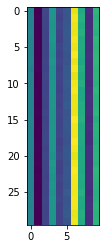

In [35]:
import matplotlib.pyplot as plt
plt.imshow(ypred[0:30,0:10])

In [11]:
score = model.evaluate(x_test, y_test_hot, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

KeyboardInterrupt: ignored

In [25]:
inpx = Input(shape=x_train.shape[1:])
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [26]:
model = Model([inpx], layer7)
model.compile(optimizer="Adadelta",
              loss="categorical_crossentropy",
              metrics=['accuracy'])
 
model.fit(x_train, y_train_hot, epochs=1, batch_size=500)

  5/120 [>.............................] - ETA: 2:20 - loss: 2.4901 - accuracy: 0.0912

KeyboardInterrupt: ignored

In [27]:
y_train_hot.shape

(60000, 10)

In [58]:
Xflat.shape

(60000, 784)

In [12]:
# https://valueml.com/multi-layer-perceptron-by-keras-with-example/
# Value ML    Riya Thakore  
from keras.models import Sequential

In [13]:
modelsimple = Sequential()
modelsimple.add(Dense(512, input_shape=(Xflat.shape[1],), activation='relu'))
modelsimple.add(Dense(768, activation='relu'))
modelsimple.add(Dense(10, activation='softmax'))

In [14]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [18]:
Xflat.shape, Xflat_test.shape

((60000, 784), (10000, 784))

In [19]:
Xflat.shape, y_train_hot.shape

((60000, 784), (60000, 10))

In [20]:
modelsimple.compile(optimizer='adam',loss="categorical_crossentropy" , metrics=['accuracy'])
modelsimple.fit(Xflat, y_train_hot, epochs=1)

1875/1875 [==============================] - 23s 12ms/step - loss: 0.1833 - accuracy: 0.9444


In [21]:
predictsimple = modelsimple.predict(Xflat_test)
predictsimple.shape

(10000, 10)

In [22]:
predictsimple[0,:]

array([3.1362589e-08, 2.4093279e-07, 3.6867743e-06, 3.7302866e-04,
       1.6836098e-10, 8.5320515e-08, 8.9053608e-12, 9.9958688e-01,
       1.3343389e-07, 3.5960871e-05], dtype=float32)

In [23]:
Xflat_test.shape, y_test_hot.shape, predictsimple.shape

((10000, 784), (10000, 10), (10000, 10))

In [25]:
scoresimple = modelsimple.evaluate(Xflat_test, y_test_hot, verbose=1)
scoresimple

313/313 [==============================] - 2s 8ms/step - loss: 0.1074 - accuracy: 0.9648


[0.10739640891551971, 0.9648000001907349]

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predictsimple, y_test_hot)

ValueError: ignored

In [27]:
predictsimple

array([[3.1362589e-08, 2.4093279e-07, 3.6867743e-06, ..., 9.9958688e-01,
        1.3343389e-07, 3.5960871e-05],
       [4.9998516e-08, 1.6063052e-05, 9.9980658e-01, ..., 3.7843995e-07,
        8.2650813e-06, 4.7339493e-10],
       [3.9513441e-05, 9.7962689e-01, 3.2288618e-03, ..., 1.2599110e-02,
        3.1246860e-03, 6.5316483e-05],
       ...,
       [8.9271008e-09, 3.5300718e-07, 9.9495445e-08, ..., 5.7461086e-05,
        1.3112112e-05, 3.3539648e-03],
       [1.1837237e-05, 4.8773543e-08, 6.0276852e-07, ..., 6.6895191e-06,
        1.6089088e-04, 2.3406335e-06],
       [6.7699645e-08, 1.9758750e-10, 7.9260850e-08, ..., 1.0072629e-10,
        2.1860571e-07, 1.1787024e-09]], dtype=float32)

In [40]:
call = np.equal(predictsimple ,np.dot(np.ones((10,1)) , predictsimple.max(axis=1)[np.newaxis,:] ).T )
call

array([[False, False, False, ...,  True, False, False],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [41]:
confusion_matrix(call, y_test_hot)

ValueError: ignored

In [42]:
# Stackoverflow....
# https://stackoverflow.com/questions/46953967/multilabel-indicator-is-not-supported-for-confusion-matrix
confusion_matrix(call.argmax(axis=1), y_test_hot.argmax(axis=1))

array([[ 971,    0,    4,    0,    1,    3,    6,    2,    5,    4],
       [   0, 1110,    0,    0,    2,    0,    2,    1,    0,    2],
       [   3,    4, 1003,    7,    8,    0,    1,   12,    8,    1],
       [   2,    6,    9,  995,    0,   32,    1,    8,   37,   14],
       [   0,    0,    1,    0,  920,    0,    3,    0,    1,    1],
       [   0,    1,    0,    3,    0,  850,    8,    0,   17,    7],
       [   2,    5,    2,    0,    5,    4,  936,    0,    5,    0],
       [   0,    3,    8,    3,    5,    0,    1,  994,    5,    3],
       [   2,    6,    5,    2,    1,    2,    0,    1,  894,    2],
       [   0,    0,    0,    0,   40,    1,    0,   10,    2,  975]])

In [28]:
y_test_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
scoresimple

[2.612765073776245, 0.0982000008225441]

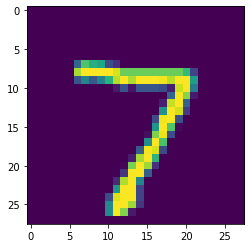

In [30]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0,:,:,0])